# Activity 4.06: Visualizing the Impact of Education on Annual Salary and Weekly Working Hours

In this activity, we will generate multiple plots using a real-life dataset. You're asked to get insights on whether the education of people has an influence on their annual salary and weekly working hours. You ask 500 people in the state of New York about their age, annual salary, weekly working hours, and their education. You first want to know the percentage for each education type, so therefore you use a tree map. Two violin plots will be used to visualize the annual salary and weekly working hours. Compare in each case to what extent education has an impact.

It should also be taken into account that all visualizations in this activity are designed to be suitable for colorblind people. In principle, this is always a good idea to bear in mind.

>Note: The American Community Survey (ACS) Public-Use Microdata Samples (PUMS) dataset (one-year estimate from 2017) from [here](https://www.census.gov/programs-surveys/acs/technical-documentation/pums/documentation.2017.html) is used in this activity. This dataset is later used in Chapter 07, Combining What We Have Learned. This dataset can also be downloaded from GitHub.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify

In [3]:
df = pd.read_csv('../../Datasets/age_salary_hours.csv')
df

,Age,Annual Salary,Weekly hours,Education
0,72,160000.0,40.0,Bachelor's degree or higher
1,72,100000.0,50.0,Bachelor's degree or higher
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


## Use a tree map to visualize the percentages for each education type. 

In [11]:
counts = df.groupby('Education').agg({'Education': 'count'})
counts

,Education
Education,
Associate's degree,50
"Attended college, no degree",89
Bachelor's degree or higher,237
High school diploma,107
No diploma,17


In [30]:
counts.Education.sum()

500

In [29]:
for t in counts.itertuples():
    print(t)

Pandas(Index="Associate's degree", Education=50)
Pandas(Index='Attended college, no degree', Education=89)
Pandas(Index="Bachelor's degree or higher", Education=237)
Pandas(Index='High school diploma', Education=107)
Pandas(Index='No diploma', Education=17)


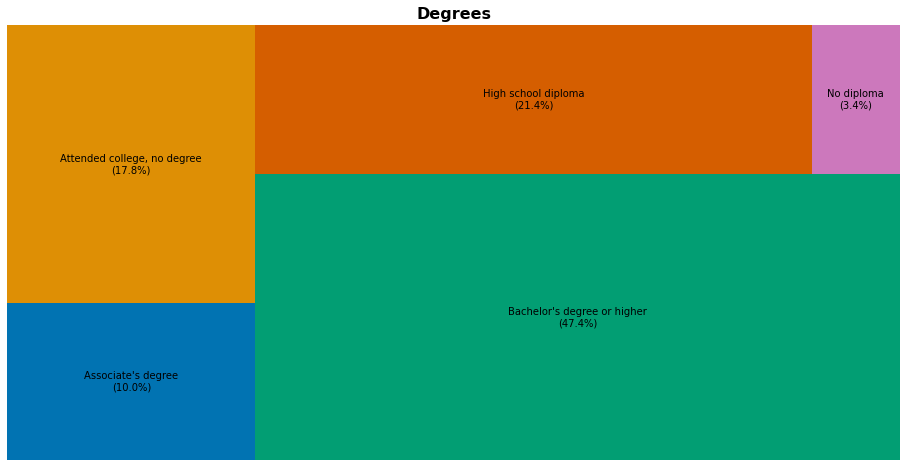

In [38]:
sizes = counts.Education.values
label=[f'{t.Index}\n({t.Education/counts.Education.sum():.1%})' for t in counts.itertuples()]
colors = sns.color_palette("colorblind", len(counts))

plt.figure(figsize=(16,8))
squarify.plot(
    sizes=sizes,
    label=label,
    color=colors
)
plt.title('Degrees', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

## Create a subplot with two rows to visualize two violin plots for the annual salary and weekly working hours, respectively. Compare in each case to what extent education has an impact. To exclude pensioners, only consider people younger than 65. Use a colormap that is suitable for colorblind people. subplots() can be used in combination with Seaborn's plot, by simply passing the ax argument with the respective axes. 

In [54]:
ordered_degrees = counts.index.unique()
ordered_degrees = [ordered_degrees[4], ordered_degrees[3], ordered_degrees[1], ordered_degrees[0], ordered_degrees[2]]
ordered_degrees

['No diploma',
 'High school diploma',
 'Attended college, no degree',
 "Associate's degree",
 "Bachelor's degree or higher"]

In [64]:
data = df[df.Age<65]
data

,Age,Annual Salary,Weekly hours,Education
2,31,120000.0,40.0,Bachelor's degree or higher
3,28,45000.0,40.0,Bachelor's degree or higher
4,54,85000.0,40.0,Bachelor's degree or higher
5,45,12000.0,40.0,High school diploma
9,46,65000.0,50.0,Bachelor's degree or higher
...,...,...,...,...
495,27,47000.0,40.0,Bachelor's degree or higher
496,53,132000.0,70.0,Bachelor's degree or higher
497,51,10100.0,20.0,Bachelor's degree or higher
498,32,57000.0,35.0,Bachelor's degree or higher


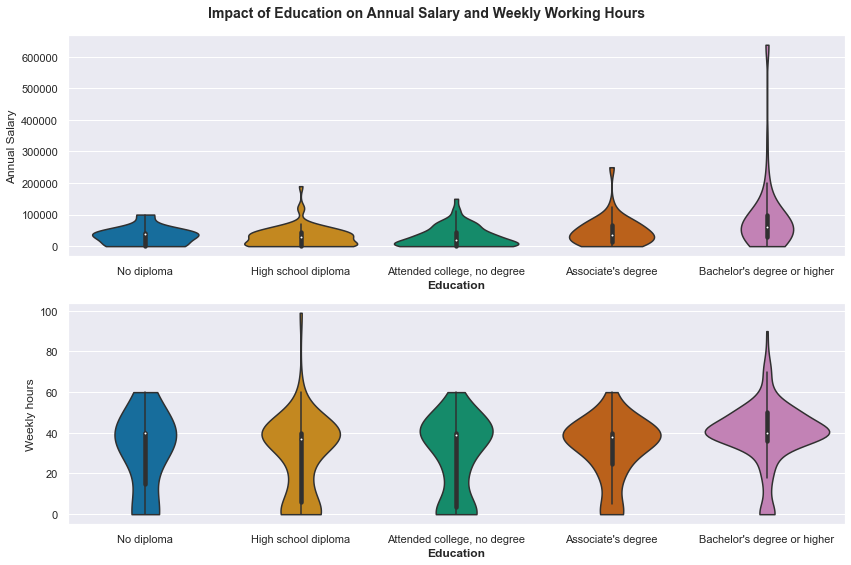

In [74]:
sns.set()
sns.set_context('notebook')
sns.set_palette('colorblind')

fig, axes = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(12,8))

sns.violinplot(
    x='Education', 
    y='Annual Salary', 
    data=data, 
    order=ordered_degrees,
    cut=0,
    ax=axes[0]
)

sns.violinplot(
    x='Education', 
    y='Weekly hours', 
    data=data, 
    order=ordered_degrees,
    cut=0,
    ax=axes[1]
)

axes[0].set_xlabel('Education', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Education', fontsize=12, fontweight='bold')

fig.suptitle('Impact of Education on Annual Salary and Weekly Working Hours', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()